In [2]:
%matplotlib widget

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./US_youtube_trending_data.csv")
display(df.head())
df.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
267982,ahx0iw78lUE,Showing Jack my memes,2024-03-31T17:32:47Z,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,24,2024-04-11T00:00:00Z,pewdiepie|pewds|pewdie|jack|pewdiepie jacksept...,2333425,161250,0,4128,https://i.ytimg.com/vi/ahx0iw78lUE/default.jpg,False,False,🌏 Get exclusive NordVPN deal here ➵ https://No...
267983,-Pcout3o4Fg,LeBron James Opens Up About The Miami Heat Lea...,2024-04-02T19:30:00Z,UC6L_LBqoKZXFa4WxHox5iCw,Mind the Game Pod w/ LeBron James and JJ Redick,22,2024-04-11T00:00:00Z,lebron james|jj redick|lebron james jj redick|...,691381,19514,0,2366,https://i.ytimg.com/vi/-Pcout3o4Fg/default.jpg,False,False,"In this preview clip for Episode 3, LeBron Jam..."
267984,-MdZRXipEHg,Reunited With Our Daughter After 3 Months! *EM...,2024-04-03T18:14:27Z,UCSxspw1FZ3K4bhdHhhibhqw,Dad V Girls,24,2024-04-11T00:00:00Z,Dad V Girls|Dad|Girls|Dad Vs Girls|Family|Fami...,584315,17181,0,667,https://i.ytimg.com/vi/-MdZRXipEHg/default.jpg,False,False,👉 Join the DVG Fam: https://bit.ly/2lf0X8J📸 D...
267985,njnpzWbhpK8,Poison (Official Remix) | Hazbin Hotel | Prime...,2024-04-01T05:23:29Z,UCzfyYtgvkx5mLy8nlLlayYg,Vivziepop,1,2024-04-11T00:00:00Z,Vivziepop|Zoophobia,1500159,145948,0,10538,https://i.ytimg.com/vi/njnpzWbhpK8/default.jpg,False,False,"Get a taste of poison…Performed by Roman, orig..."
267986,u5P0n2t9RNA,Triple H Goes Sneaker Shopping With Complex,2024-04-01T14:00:39Z,UCE_--R1P5-kfBzHTca0dsnw,Complex,24,2024-04-11T00:00:00Z,Triple H|WWE|wwe raw|wrestlemania 40|roman rei...,1212337,41642,0,2912,https://i.ytimg.com/vi/u5P0n2t9RNA/default.jpg,False,False,WWE Legend Triple H goes Sneaker Shopping with...


In [5]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [6]:
df['view_count'].sort_values(ascending= False)

266187    1407643634
266388    1406329649
265987     628718636
152788     277791741
152568     273162966
             ...    
49597              0
126641             0
126404             0
200521             0
20184              0
Name: view_count, Length: 267987, dtype: int64

In [7]:
#Views and Likes and title 
#Views/Dislikes
#Category ID and Views/Likes/Dislikes/Comment Count
#Publish Time and Views/Comment Count

In [8]:
df['likes'].sort_values(ascending= False)

56374     16021534
3358      15735533
3137      15460822
2894      15246496
2653      14994034
            ...   
28118            0
217710           0
217735           0
107828           0
177394           0
Name: likes, Length: 267987, dtype: int64

In [9]:
top_10_most_viewed = df.sort_values(by='view_count', ascending=False).head(10)
top_10_most_viewed 

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03T00:00:00Z,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
266388,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-04T00:00:00Z,[None],1406329649,165173,0,17446,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
265987,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-02T00:00:00Z,[None],628718636,47460,0,4829,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152568,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-09T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,273162966,12937252,0,3516745,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152365,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-08T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,268758295,12882841,0,3504692,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152175,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-07T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,264459017,12829059,0,3491132,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
151968,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-06T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,260126694,12773474,0,3479717,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151773,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,255524865,12715882,0,3466961,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...


In [10]:
top_10_most_liked = df.sort_values(by='likes', ascending=False).head(10)
top_10_most_liked

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2418,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-24T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,183414472,14678048,576852,5748638,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55994,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-23T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,166895681,14202518,51663,5987770,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
2201,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-23T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,160510938,14134480,505291,5452026,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55791,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-22T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,133484128,13361198,28528,5594286,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...


In [11]:
df_sorted_view = df.sort_values(by=['view_count'], ascending=[False])
df_sorted_view

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03T00:00:00Z,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
266388,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-04T00:00:00Z,[None],1406329649,165173,0,17446,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
265987,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-02T00:00:00Z,[None],628718636,47460,0,4829,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152568,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-09T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,273162966,12937252,0,3516745,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49597,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19T15:00:08Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-21T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/69KrkMpvZdg/default.jpg,True,True,"Today’s video Doodle, created by Atlanta-based..."
126641,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29T16:46:04Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-03T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...
126404,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29T16:46:04Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-02T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...
200521,LHCTW4pckDo,Live at the Met Gala With Vogue,2023-05-02T01:36:13Z,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,26,2023-05-07T00:00:00Z,vogue|met gala|emma chamberlain|metgala23-live...,0,96043,0,1856,https://i.ytimg.com/vi/LHCTW4pckDo/default.jpg,False,False,"For the third year in a row, Vogue will be hos..."


In [12]:
unique_videos_view = df_sorted_view.drop_duplicates(subset='title', keep='first')

unique_videos_view

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03T00:00:00Z,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08T00:00:00Z,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126865,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29T16:46:04Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-04T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...
65504,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25T21:04:38Z,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-29T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,1739,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate..."
65528,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26T00:07:19Z,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-29T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,147,https://i.ytimg.com/vi/kmk5vciFbek/default.jpg,False,True,"On June 25, celebrate Pride 2021 with Demi Lov..."
74492,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-13T00:00:00Z,[None],0,22030,1604,0,https://i.ytimg.com/vi/Hb3rmh-_FMw/default.jpg,True,False,*****EPILEPSY WARNING ********Watch and create...


In [13]:
df_sorted_likes = df.sort_values(by=['likes'], ascending=[False])
df_sorted_likes

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28118,k5XukvUA1Nk,Kylie Jenner: Christmas Decorations 2020,2020-12-26T04:07:01Z,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2021-01-03T00:00:00Z,[None],8690969,0,0,14996,https://i.ytimg.com/vi/k5XukvUA1Nk/default.jpg,False,True,Stormi and I take you on a tour of my Christma...
217710,a4sjgbrnus8,(NO REMATCH!!) Crawford is the SUPERIOR Fighter!,2023-07-30T14:20:59Z,UCYxVAOXX7beQCyXb4OW_Z2g,ShowBizz The Adult,17,2023-08-03T00:00:00Z,[None],352436,0,0,8064,https://i.ytimg.com/vi/a4sjgbrnus8/default.jpg,False,True,#errolspence #terencecrawford #showbizz
217735,_APQSQtP0bE,I CANNOT BELIEVE WHAT I JUST WATCHED!! TERRENC...,2023-07-30T05:27:26Z,UCShLzlyKXSC32InQzFk3fOQ,Paulie TV,17,2023-08-03T00:00:00Z,[None],226958,0,0,3293,https://i.ytimg.com/vi/_APQSQtP0bE/default.jpg,False,True,HOLY!!!!!!!!FOLLOW @PAULIE.TV ON IG
107828,jJX5CrTg0F4,Eliminatorias | Ecuador 1-1 Brasil | Fecha 15,2022-01-28T01:35:44Z,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17,2022-01-29T00:00:00Z,fútbol|pelota|gol|copa|libertadores|sudamerica...,1643210,0,0,4375,https://i.ytimg.com/vi/jJX5CrTg0F4/default.jpg,False,True,"En un partido muy parejo, la Tri y la Canarinh..."


In [14]:
df = unique_videos_view
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03T00:00:00Z,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08T00:00:00Z,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126865,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29T16:46:04Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-04T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...
65504,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25T21:04:38Z,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-29T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,1739,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate..."
65528,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26T00:07:19Z,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-29T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,147,https://i.ytimg.com/vi/kmk5vciFbek/default.jpg,False,True,"On June 25, celebrate Pride 2021 with Demi Lov..."
74492,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-13T00:00:00Z,[None],0,22030,1604,0,https://i.ytimg.com/vi/Hb3rmh-_FMw/default.jpg,True,False,*****EPILEPSY WARNING ********Watch and create...


In [15]:
# # Question: Which videos are currently trending?

current_trending_videos = df[df['trending_date'] == df['trending_date'].max()]
current_trending_videos

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
267919,mKdjycj-7eE,"Stop This Train, Win a Lamborghini",2024-03-16T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-11T00:00:00Z,[None],115271012,4276347,0,126646,https://i.ytimg.com/vi/mKdjycj-7eE/default.jpg,False,False,I still can’t believe what happened in this vi...
267836,erLbbextvlY,7 Days Stranded On An Island,2024-03-30T16:00:01Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-11T00:00:00Z,[None],108502278,4613204,0,126888,https://i.ytimg.com/vi/erLbbextvlY/default.jpg,False,False,I can’t believe we actually did thisSend money...
267968,2wA_b6YHjqQ,BABYMONSTER - ‘SHEESH’ M/V,2024-03-31T15:00:08Z,UCqwUnggBBct-AY2lAdI88jQ,BABYMONSTER,22,2024-04-11T00:00:00Z,BABYMONSTER|베이비몬스터|베몬|BABYMON|BAEMON|하람|아현|루카|...,101967017,2291274,0,165478,https://i.ytimg.com/vi/2wA_b6YHjqQ/default.jpg,False,False,SHEESHDa la lun dunDa la lun dunDa la lun dunB...
267963,DiHUEWBRQEI,TXT (투모로우바이투게더) 'Deja Vu' Official MV,2024-04-01T08:58:06Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2024-04-11T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,45768299,965451,0,163965,https://i.ytimg.com/vi/DiHUEWBRQEI/default.jpg,False,False,TXT (투모로우바이투게더) 'Deja Vu' Official MVCredits:W...
267952,m7sp-FTeZWE,skibidi toilet 72 (part 2),2024-04-01T13:00:07Z,UCsSsgPaZ2GSmO6il8Cb5iGA,DaFuq!?Boom!,24,2024-04-11T00:00:00Z,sfm animation|skibidi toilet vs cameramen|skib...,29731675,1212478,0,105448,https://i.ytimg.com/vi/m7sp-FTeZWE/default.jpg,False,False,g-toilet battles with astrofull-screen version...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267944,FIcltYpGuQU,Rep. Lauren Boebert hospitalized with acute bl...,2024-04-03T14:56:01Z,UCkRP0nS2qERsw-U-OTLbI0A,FOX31 Denver,25,2024-04-11T00:00:00Z,denver|colorado|news|kdvr|fox31,131578,2299,0,3231,https://i.ytimg.com/vi/FIcltYpGuQU/default.jpg,False,False,"Rep. Lauren Boebert, of Colorado’s 3rd distric..."
267841,liNJPPqo0c8,WBB Postgame: (Iowa) South Carolina Press Conf...,2024-04-07T23:57:01Z,UCIJ8yiBEYi7OSDtJmTZnUZQ,South Carolina Gamecocks,17,2024-04-11T00:00:00Z,[None],126862,2909,0,525,https://i.ytimg.com/vi/liNJPPqo0c8/default.jpg,False,False,"South Carolina Head Coach Dawn Staley, Senior ..."
267810,yvB5gQVyVtI,Detailed Look! All New 2025 6th Gen Toyota 4Ru...,2024-04-10T02:15:02Z,UCVaQcr-1Ct5xIzpjF8P9VzQ,TRD JON,2,2024-04-11T00:00:00Z,[None],109587,3438,0,769,https://i.ytimg.com/vi/yvB5gQVyVtI/default.jpg,False,False,It's here! The all new 2025 6th Generation Toy...
267856,Ii4jXrMqXf4,"17,000 units of cargo being rerouted to the pe...",2024-04-08T01:57:47Z,UC4DGZQHLsQRK3v8lKTGu_Uw,WJCL News,25,2024-04-11T00:00:00Z,Savannah,100820,751,0,0,https://i.ytimg.com/vi/Ii4jXrMqXf4/default.jpg,True,False,"17,000 units of cargo being rerouted to the pe..."


In [16]:
# Question: # How long does it take for a video to become trending after being published?


# Assuming df is your DataFrame containing the dataset
# Convert 'publishedAt' and 'trending_date' columns to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Calculate time to trend
df['time_to_trend'] = df['trending_date'] - df['publishedAt']

# Find average or median time to trend
average_time_to_trend = df['time_to_trend'].mean()
median_time_to_trend = df['time_to_trend'].median()

print("Average time to trend:", average_time_to_trend)
print("Median time to trend:", median_time_to_trend)

Average time to trend: 5 days 12:45:07.435805711
Median time to trend: 5 days 08:59:43


/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/1756668958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/1756668958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trending_date'] = pd.to_datetime(df['trending_date'])
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/1756668958.py:10: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [17]:
# # Question: # Are there specific categories/tags that tend to trend more frequently?

df['tags'] = df['tags'].str.split('|')
# Create a list of all tags
all_tags = [tag for sublist in df['tags'] for tag in sublist]
# Count occurrences of each tag
tag_counts = pd.Series(all_tags).value_counts()
# Display the top 10 most common tags
print("Top 10 most common tags among trending videos:")
print(tag_counts.head(10))

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/2446905906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].str.split('|')


Top 10 most common tags among trending videos:
[None]             8021
funny              2667
comedy             1701
minecraft          1636
challenge          1118
gaming              930
vlog                912
news                774
NBA                 727
family friendly     704
Name: count, dtype: int64


In [18]:

# Assuming df is your DataFrame containing the dataset
# Select the columns for likes, dislikes, and comments
likes_dislikes_comments = df[['likes', 'dislikes', 'comment_count']]

# Calculate the correlation matrix
correlation_matrix = likes_dislikes_comments.corr()

print("Correlation matrix between likes, dislikes, and comments:")
print(correlation_matrix)

Correlation matrix between likes, dislikes, and comments:
                  likes  dislikes  comment_count
likes          1.000000  0.465583       0.683727
dislikes       0.465583  1.000000       0.466269
comment_count  0.683727  0.466269       1.000000


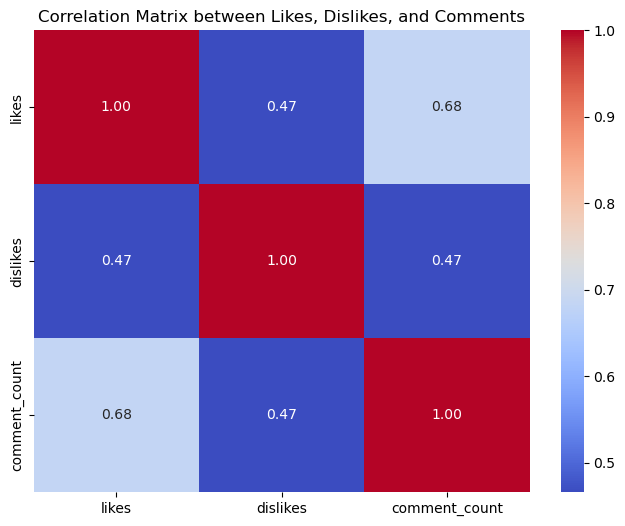

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Select the columns for likes, dislikes, and comments
likes_dislikes_comments = df[['likes', 'dislikes', 'comment_count']]

# Calculate the correlation matrix
correlation_matrix = likes_dislikes_comments.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Likes, Dislikes, and Comments')
plt.show()

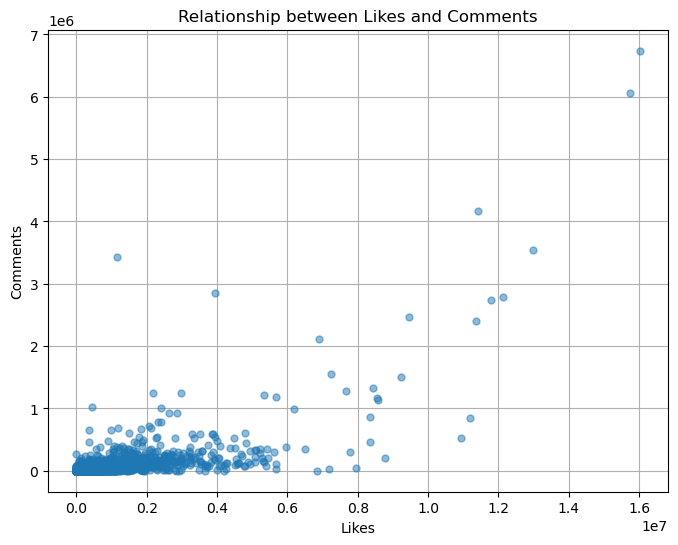

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Select the columns for likes and comments
likes_comments = df[['likes', 'comment_count']]

# Plot the relationship between likes and comments
plt.figure(figsize=(8, 6))
plt.plot(likes_comments['likes'], likes_comments['comment_count'], marker='o', linestyle='', markersize=5, alpha=0.5)
plt.title('Relationship between Likes and Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.grid(True)
plt.show()


In [21]:
#  Do videos with more likes tend to have more views?

# Assuming df is your DataFrame containing the dataset
# Select the columns for likes and views
likes_views = df[['likes', 'view_count']]

# Calculate the correlation coefficient
correlation_coefficient = likes_views.corr().iloc[0, 1]

print("Correlation coefficient between likes and views:", correlation_coefficient)
print("This indicates a strong positive correlation between likes and view count.")

Correlation coefficient between likes and views: 0.6301570854051254
This indicates a strong positive correlation between likes and view count.


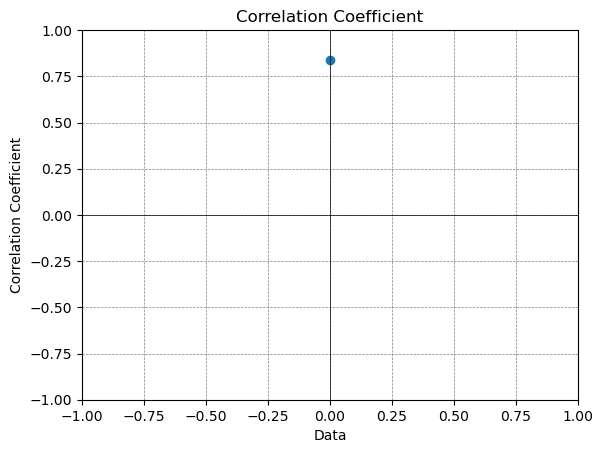

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Example correlation coefficient
correlation_coefficient = 0.8375824158274177

# Create a scatter plot to visualize the correlation coefficient
plt.scatter(0, correlation_coefficient)
plt.title('Correlation Coefficient')
plt.xlabel('Data')
plt.ylabel('Correlation Coefficient')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

In [23]:
# How do likes and comments vary based on the time of publishing?


# Assuming df is your DataFrame containing the dataset
# Convert 'publishedAt' column to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract hour of the day from 'publishedAt'
df['hour_of_publishing'] = df['publishedAt'].dt.hour

# Group by hour of publishing and calculate average likes and comments
likes_comments_by_hour = df.groupby('hour_of_publishing')[['likes', 'comment_count']].mean()

likes_comments_by_hour

# print("Average likes and comments based on the time of publishing (hour of the day):")
# print(likes_comments_by_hour)

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/3539095290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/3539095290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_of_publishing'] = df['publishedAt'].dt.hour


,likes,comment_count
hour_of_publishing,,
0,115858.725922,7255.293244
1,92470.500943,6688.684475
2,71589.575591,8017.000000
3,159252.730860,25854.333070
4,236290.218972,23503.998670
5,152253.484751,11249.609149
6,116166.612903,9131.814516
7,138670.890909,7670.875325
8,221938.643182,24361.947727


/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/742685545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/742685545.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_of_publishing'] = df['publishedAt'].dt.hour


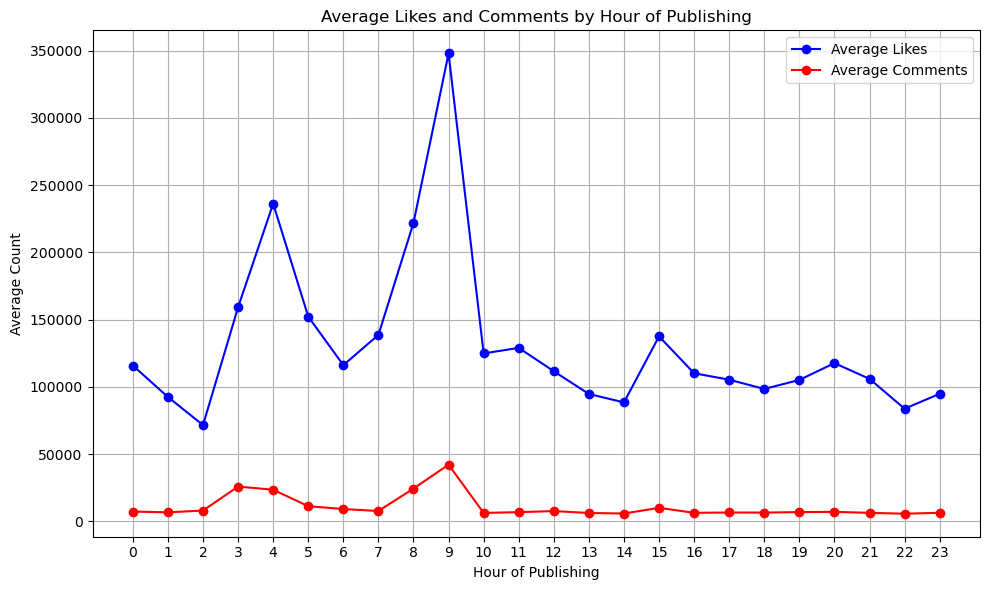

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Convert 'publishedAt' column to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract hour of the day from 'publishedAt'
df['hour_of_publishing'] = df['publishedAt'].dt.hour

# Group by hour of publishing and calculate average likes and comments
likes_comments_by_hour = df.groupby('hour_of_publishing')[['likes', 'comment_count']].mean()

# Plot
plt.figure(figsize=(10, 6))

# Likes
plt.plot(likes_comments_by_hour.index, likes_comments_by_hour['likes'], label='Average Likes', marker='o', color='b')

# Comments
plt.plot(likes_comments_by_hour.index, likes_comments_by_hour['comment_count'], label='Average Comments', marker='o', color='r')

# Title and labels
plt.title('Average Likes and Comments by Hour of Publishing')
plt.xlabel('Hour of Publishing')
plt.ylabel('Average Count')
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.grid(True)

# Legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [25]:
# Audience Interaction:
# Are there any patterns in viewer engagement based on the video's category/tags?
# How do comments vary depending on whether comments are enabled or disabled?
# Is there a relationship between the number of comments and the presence of specific tags?


In [26]:
# Are there any patterns in viewer engagement based on the video's tags?

df_expanded = df.explode('tags')

engagement_by_tag = df_expanded.groupby('tags').agg({
    'view_count': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean',
    "title":list
}).reset_index()

top_tags_by_view = engagement_by_tag.sort_values(by="view_count", ascending=False).head(10)
top_tags_by_like = engagement_by_tag.sort_values(by="likes", ascending=False).head(10)
top_tags_by_dislike = engagement_by_tag.sort_values(by="dislikes", ascending=False).head(10)
top_tags_by_comment = engagement_by_tag.sort_values(by="comment_count", ascending=False).head(10)

engagement_by_tag.head(10)

,tags,view_count,likes,dislikes,comment_count,title
0,,8.923289e+06,376966.965517,1797.0,21262.034483,"[SHAKIRA || BZRP Music Sessions #53, PESO PLUM..."
1,#MTVFreshOut,1.082474e+06,149081.000000,0.0,2790.000000,[Nayeon Performs ‘POP!’ | #MTVFreshOut]
2,#Shorts,1.727440e+06,41942.000000,1628.5,313.500000,"[This slo-mo 🙌 | #Shorts, He finally landed it..."
3,#shorts,9.241286e+06,465712.000000,200.5,7821.750000,"[He really did that 😦😳 | #shorts, He was fed u..."
4,#shorts,2.003610e+05,2812.000000,0.0,474.000000,[Recap Busch Light Clash practice at LA Memori...
5,1000 to 1,2.196410e+05,16824.000000,0.0,806.000000,"[10 Youtubers Decide Who Wins $1000, 10 Youtub..."
6,11/29/23,1.236019e+06,28716.000000,0.0,1961.000000,[The Patriarch Christian Cage responds to Adam...
7,1st ODI,7.037056e+06,158995.000000,0.0,9088.000000,[Bangladesh vs India Highlights || 1st ODI || ...
8,1st T20i,3.903225e+06,84049.000000,0.0,1989.000000,[Bangladesh vs England Highlights || 1st T20i ...
9,2023,4.932030e+05,4628.500000,0.0,288.500000,[Highlights | Round 4 & Playoff | Rocket Mortg...


In [27]:
engagement_by_tag.shape

(251901, 6)

<Axes: >

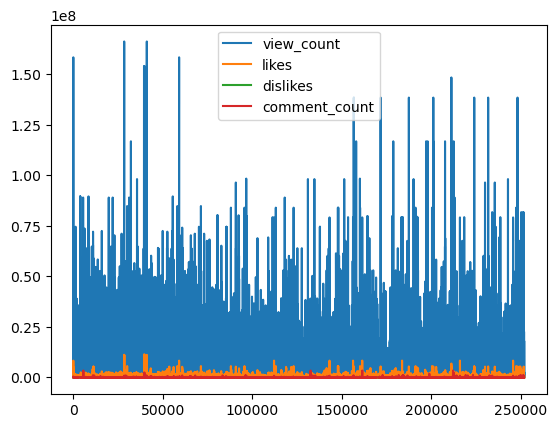

In [28]:
engagement_by_tag.plot()


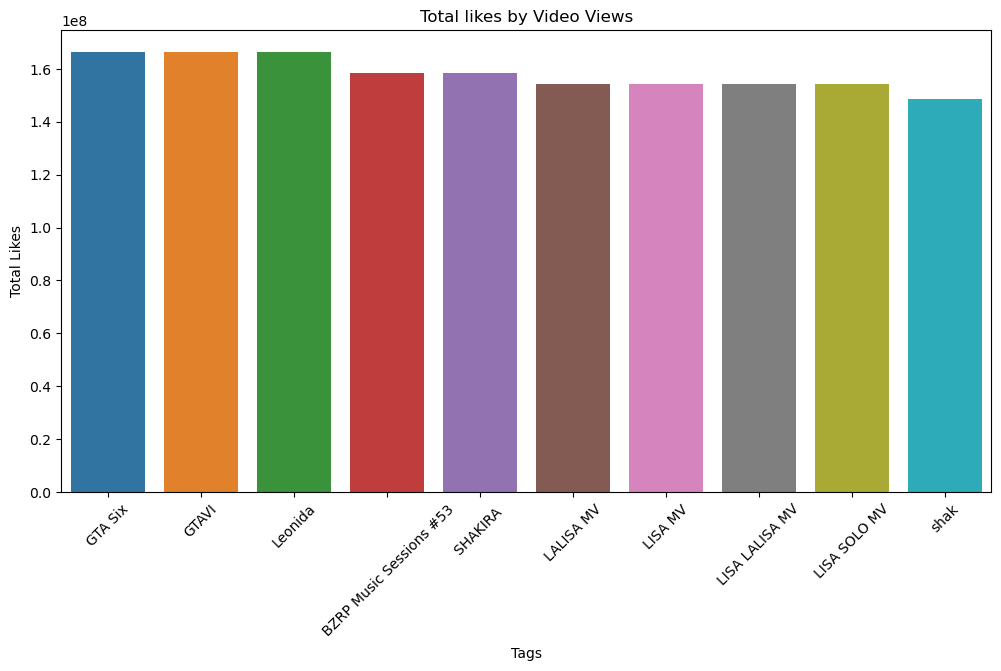

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tags', y='view_count', data=top_tags_by_view)
plt.title('Total likes by Video Views')
plt.xlabel('Tags')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.show()

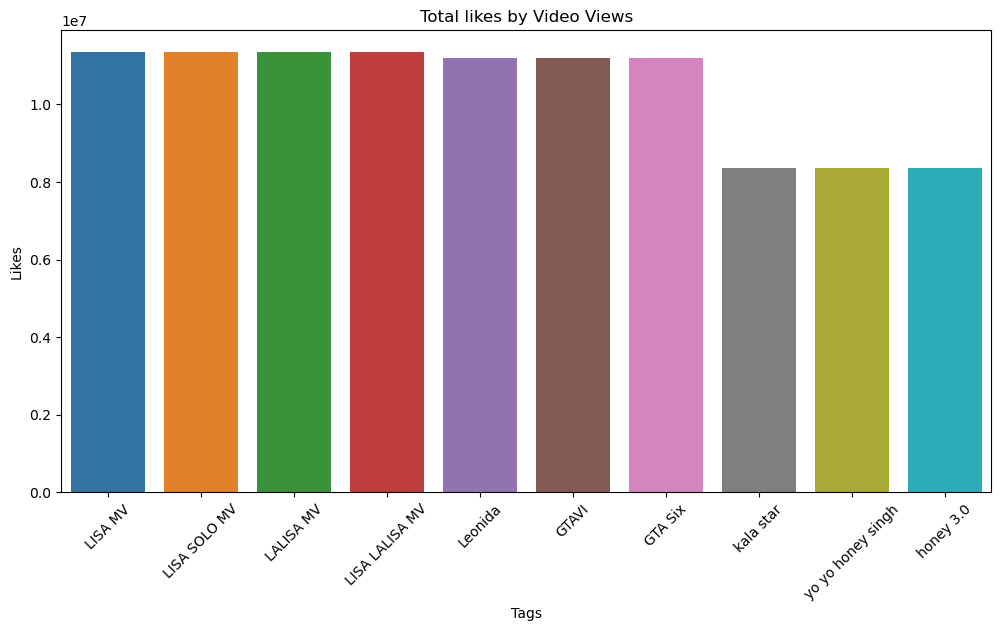

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tags', y='likes', data=top_tags_by_like)
plt.title('Total likes by Video Views')
plt.xlabel('Tags')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

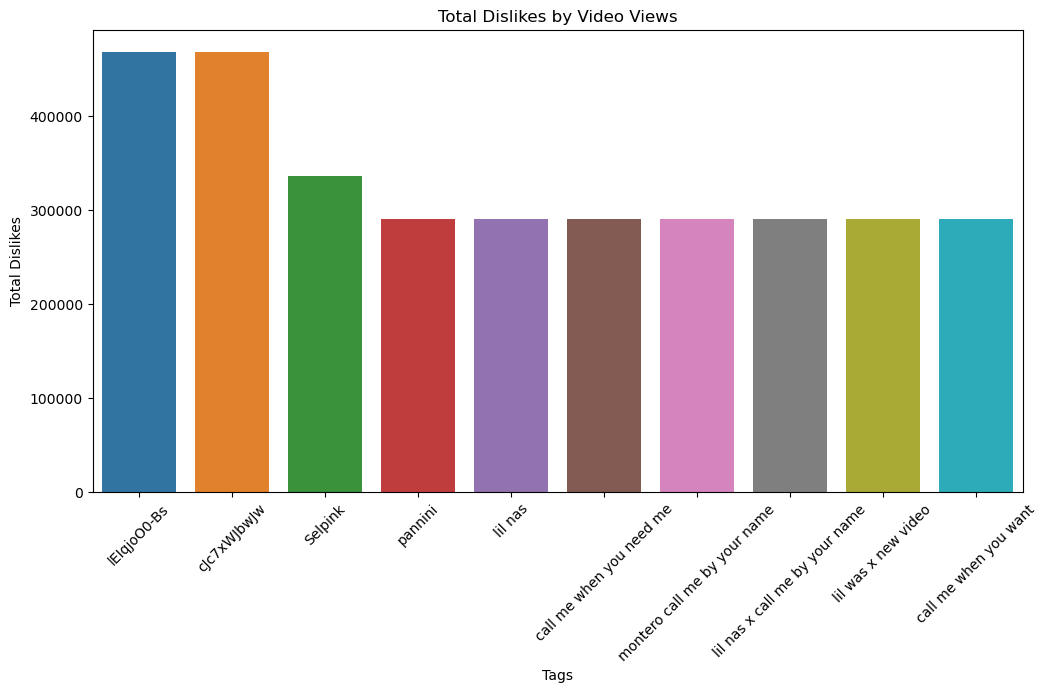

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tags', y='dislikes', data=top_tags_by_dislike)
plt.title('Total Dislikes by Video Views')
plt.xlabel('Tags')
plt.ylabel('Total Dislikes')
plt.xticks(rotation=45)
plt.show()

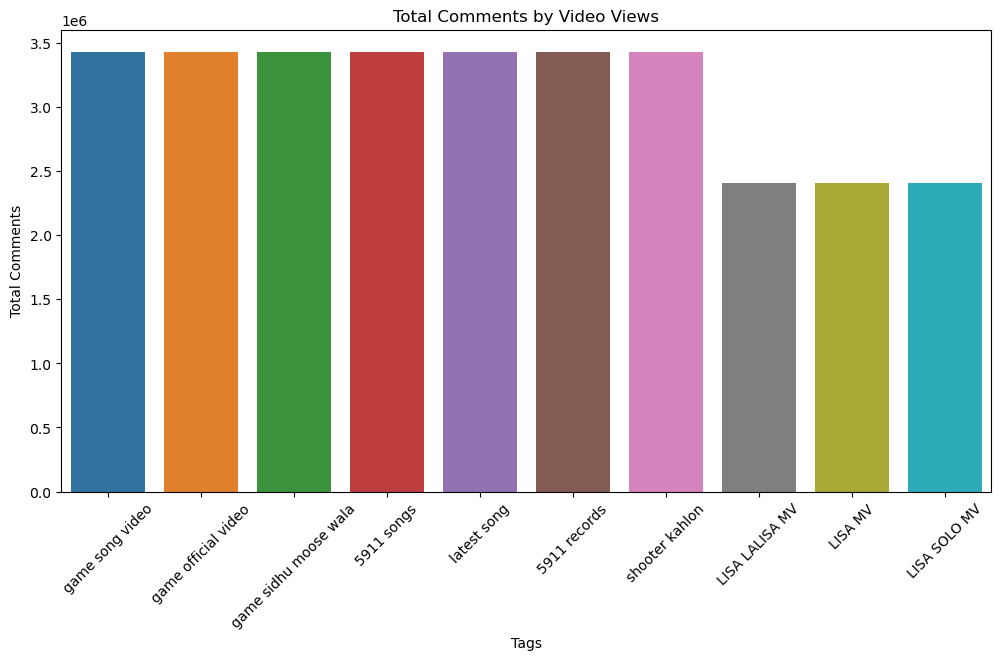

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tags', y='comment_count', data=top_tags_by_comment)
plt.title('Total Comments by Video Views')
plt.xlabel('Tags')
plt.ylabel('Total Comments')
plt.xticks(rotation=45)
plt.show()


In [33]:
# How do comments vary depending on whether comments are enabled or disabled?

comments_by_disabled = df.groupby('comments_disabled').agg({
    'comment_count': 'sum'  
}).reset_index()
comments_by_disabled

# plt.figure(figsize=(8, 6))
# plt.bar(comments_by_disabled['comments_disabled'], comments_by_disabled['comment_count'], color='skyblue')
# plt.xlabel('Comments Disabled')
# plt.ylabel('Total Comment Count')
# plt.title('Comments Variation based on Comments Enabled/Disabled')
# plt.xticks([0, 1], ['Comments Enabled', 'Comments Disabled'])
# plt.show()

# "1e8" is a shorthand notation in mathematics and computer science that represents the number 1 followed by 8 zeros,
#which is equivalent to 100,000,000 in standard decimal notation.



,comments_disabled,comment_count
0,False,429521192
1,True,0


In [34]:
# Is there a relationship between the number of comments and the presence of specific tags?

top_tags_by_views = engagement_by_tag.sort_values(by='view_count', ascending=False).head(10)
print("Top tags by average view count:")
print(top_tags_by_views)

Top tags by average view count:
                            tags   view_count       likes  dislikes  \
28431                    GTA Six  166323421.0  11192833.0       0.0   
28454                      GTAVI  166323421.0  11192833.0       0.0   
41084                    Leonida  166323421.0  11192833.0       0.0   
31       BZRP Music Sessions #53  158477831.0   8333879.0       0.0   
59132                   SHAKIRA   158477831.0   8333879.0       0.0   
39531                  LALISA MV  154134590.0  11348978.0  113448.0   
39785                    LISA MV  154134590.0  11348978.0  113448.0   
39782             LISA LALISA MV  154134590.0  11348978.0  113448.0   
39788               LISA SOLO MV  154134590.0  11348978.0  113448.0   
211225                      shak  148512957.0   6897651.0       0.0   

        comment_count                                              title  
28431        847960.0                    [Grand Theft Auto VI Trailer 1]  
28454        847960.0               

In [35]:
# Channel Performance: 
# Which channels have the highest number of views, likes, or comments?
# Do certain channels consistently produce trending content?

In [36]:
# Which channels have the highest number of views, likes, or comments?
channel_stats = df.groupby('channelTitle').agg({
    'view_count': 'sum',
    'likes': 'sum',
    'comment_count': 'sum'
}).reset_index()
top_channels_by_views = channel_stats.sort_values(by='view_count', ascending=False)
top_channels_by_views = top_channels_by_views.head(10)
top_channels_by_views

,channelTitle,view_count,likes,comment_count
4768,MrBeast,5696752953,272666212,11524034
2854,HYBE LABELS,2304949299,195283990,28989959
581,BLACKPINK,1992343037,156460294,20614792
5975,SMTOWN,1735182663,79736761,13867272
3254,JYP Entertainment,1647953452,79051919,13088668
1849,Discord,1407643634,126926,13987
1638,DaFuq!?Boom!,1357821776,45226051,3886969
4877,NFL,1179309431,19001820,2374526
4770,MrBeast Gaming,928889949,43332465,3303133
4841,NBA,906500493,9590958,1538525


In [37]:
# Do certain channels consistently produce trending content?
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

channel_trend_frequency = df.groupby(['channelTitle', 'trending_date']).size().reset_index(name='frequency')

channel_total_trend_appearances = channel_trend_frequency.groupby('channelTitle')['frequency'].sum().reset_index()

threshold = 20  

consistent_channels = channel_total_trend_appearances[channel_total_trend_appearances['frequency'] > threshold]

consistent_channels = consistent_channels.sort_values(by='frequency', ascending=False)
consistent_channels = consistent_channels.head(10)
consistent_channels

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/7220276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')


,channelTitle,frequency
4877,NFL,426
4841,NBA,398
4852,NBC Sports,170
2050,ESPN,132
5992,SSundee,131
7506,Veritasium,111
2660,Genshin Impact,104
6087,Saturday Night Live,103
5923,Ryan Trahan,103
1993,Dude Perfect,103


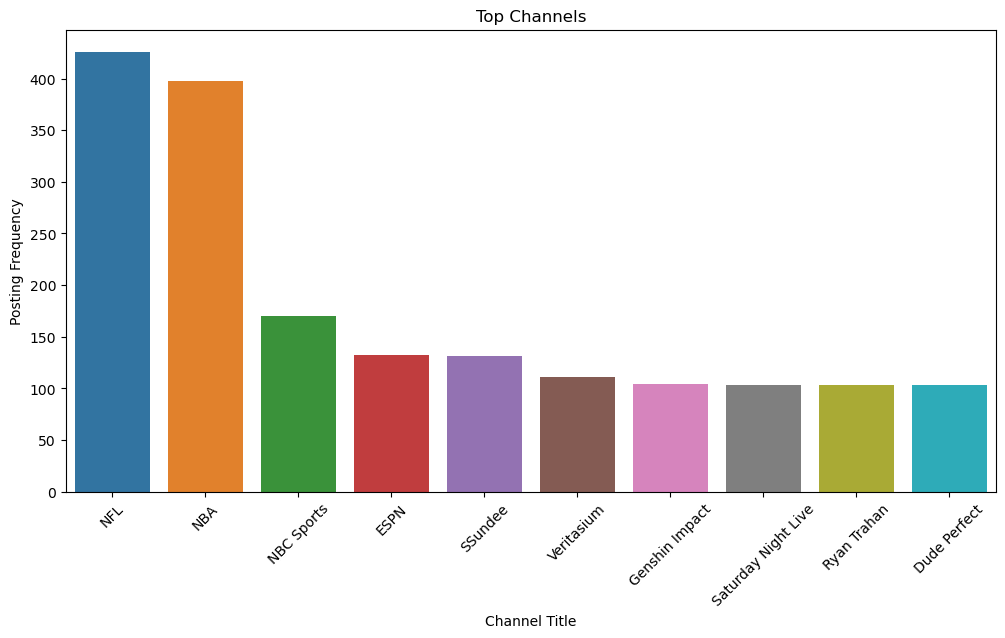

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='channelTitle', y='frequency', data=consistent_channels)
plt.title('Top Channels')
plt.xlabel('Channel Title')
plt.ylabel('Posting Frequency')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Calculate description length in terms of number of characters
df['description_length'] = df['description'].str.len()
df['description_length']

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/2973486073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_length'] = df['description'].str.len()


266187     100.0
152788    2279.0
56374     2264.0
3358      1929.0
73564      248.0
           ...  
126865     769.0
65504     2003.0
65528     1904.0
74492       79.0
80754      562.0
Name: description_length, Length: 48361, dtype: float64

In [40]:
# Group videos into categories based on description length
# You can adjust the bins and labels according to your preference
df['description_category'] = pd.cut(df['description_length'], bins=[200, 500, 1000, float('inf')],
                                     labels=['Short', 'Medium', 'Long'])
df['description_category']


/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/1994821333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_category'] = pd.cut(df['description_length'], bins=[200, 500, 1000, float('inf')],


266187       NaN
152788      Long
56374       Long
3358        Long
73564      Short
           ...  
126865    Medium
65504       Long
65528       Long
74492        NaN
80754     Medium
Name: description_category, Length: 48361, dtype: category
Categories (3, object): ['Short' < 'Medium' < 'Long']

In [41]:
# Calculate average engagement metrics for each category
engagement_by_description = df.groupby('description_category').agg({
    'view_count': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()
engagement_by_description

,description_category,view_count,likes,dislikes,comment_count
0,Short,2.249673e+06,106812.963998,931.549560,6954.937066
1,Medium,2.498876e+06,109748.137410,1034.643799,8756.482815
2,Long,2.937628e+06,126708.719430,1293.564719,10747.250582


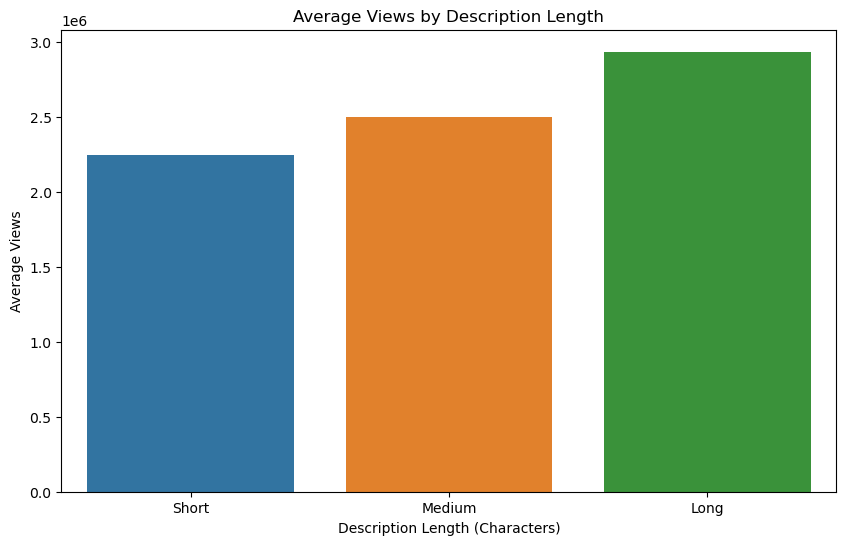

In [42]:
# Visualize relationship between description length and engagement metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='description_category', y='view_count', data=engagement_by_description)
plt.title('Average Views by Description Length')
plt.xlabel('Description Length (Characters)')
plt.ylabel('Average Views')
plt.show()

In [43]:
# Group videos by category and calculate average number of comments
comments_by_category = df.groupby('categoryId')['comment_count'].mean().reset_index()
comments_by_category

,categoryId,comment_count
0,1,7242.614432
1,2,3555.086224
2,10,24904.488143
3,15,3541.024038
4,17,3188.226792
5,19,2813.455446
6,20,5911.889627
7,22,6078.907079
8,23,5746.506725
9,24,8364.658482


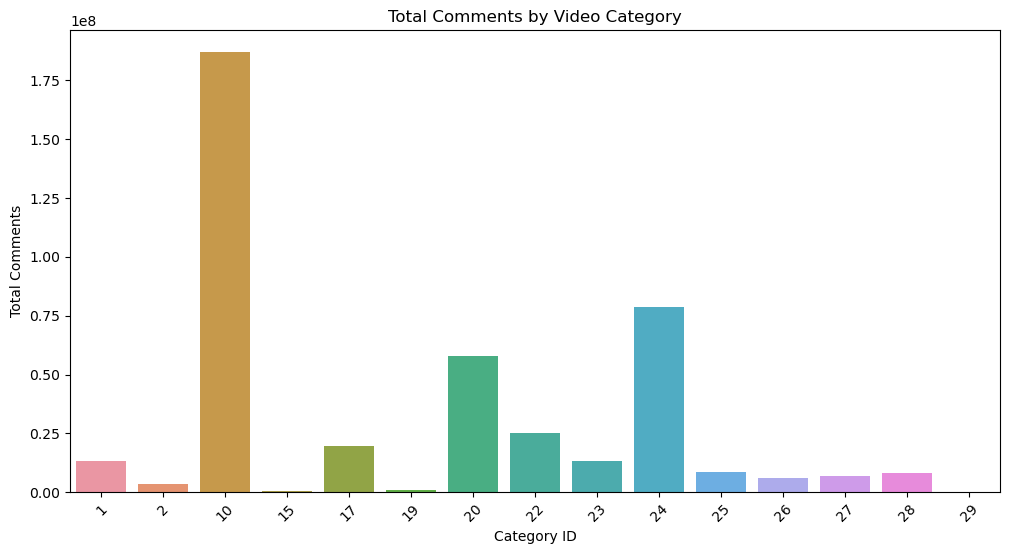

In [44]:
# Group videos by category and calculate total comments
comments_by_category = df.groupby('categoryId')['comment_count'].sum().reset_index()

# Sort the data by total comments
comments_by_category = comments_by_category.sort_values(by='comment_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='categoryId', y='comment_count', data=comments_by_category)
plt.title('Total Comments by Video Category')
plt.xlabel('Category ID')
plt.ylabel('Total Comments')
plt.xticks(rotation=45)
plt.show()

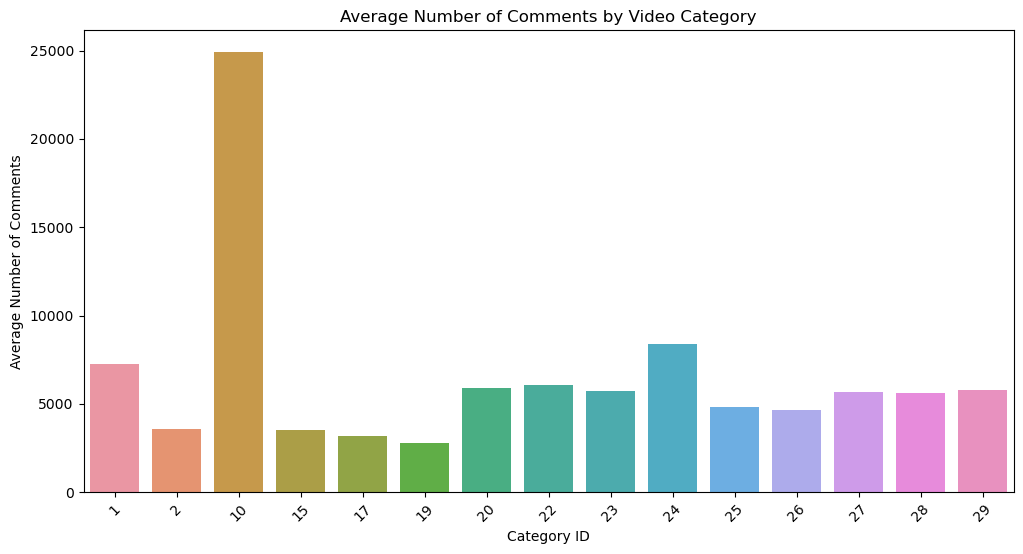

In [45]:
# Group videos by category and calculate average number of comments
comments_by_category = df.groupby('categoryId')['comment_count'].mean().reset_index()

# Sort the data by average number of comments
comments_by_category = comments_by_category.sort_values(by='comment_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='categoryId', y='comment_count', data=comments_by_category)
plt.title('Average Number of Comments by Video Category')
plt.xlabel('Category ID')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=45)
plt.show()

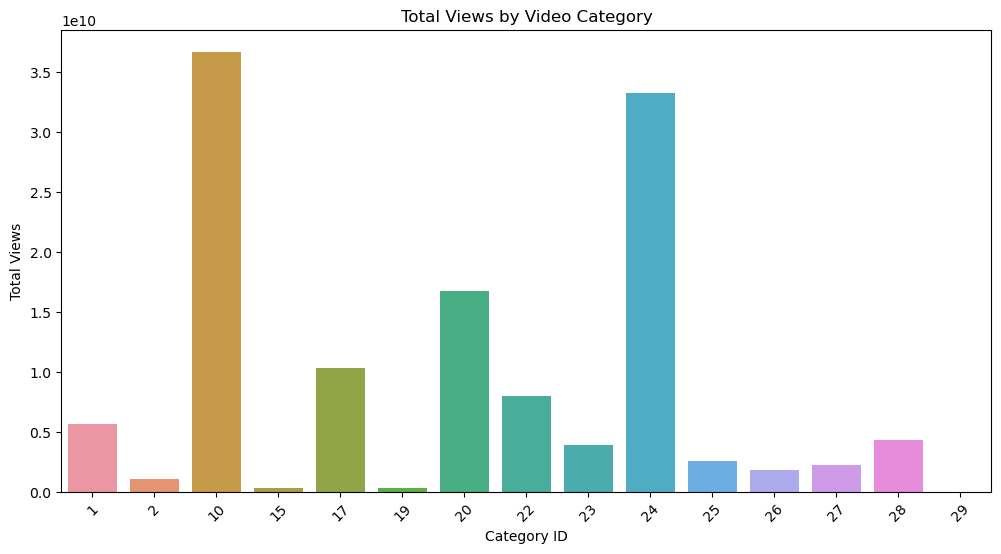

In [46]:
# Group videos by category and calculate total views
views_by_category = df.groupby('categoryId')['view_count'].sum().reset_index()

# Sort the data by total views
views_by_category = views_by_category.sort_values(by='view_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='categoryId', y='view_count', data=views_by_category)
plt.title('Total Views by Video Category')
plt.xlabel('Category ID')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

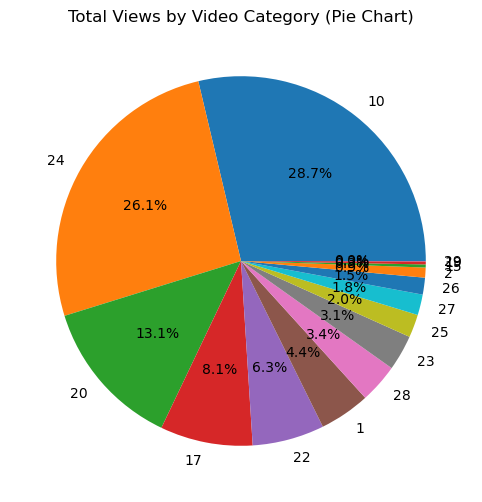

In [47]:
plt.figure(figsize=(10, 6))
plt.pie(views_by_category['view_count'], labels=views_by_category['categoryId'], autopct='%1.1f%%')
plt.title('Total Views by Video Category (Pie Chart)')
plt.show()

/Users/mahshid/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mahshid/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mahshid/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


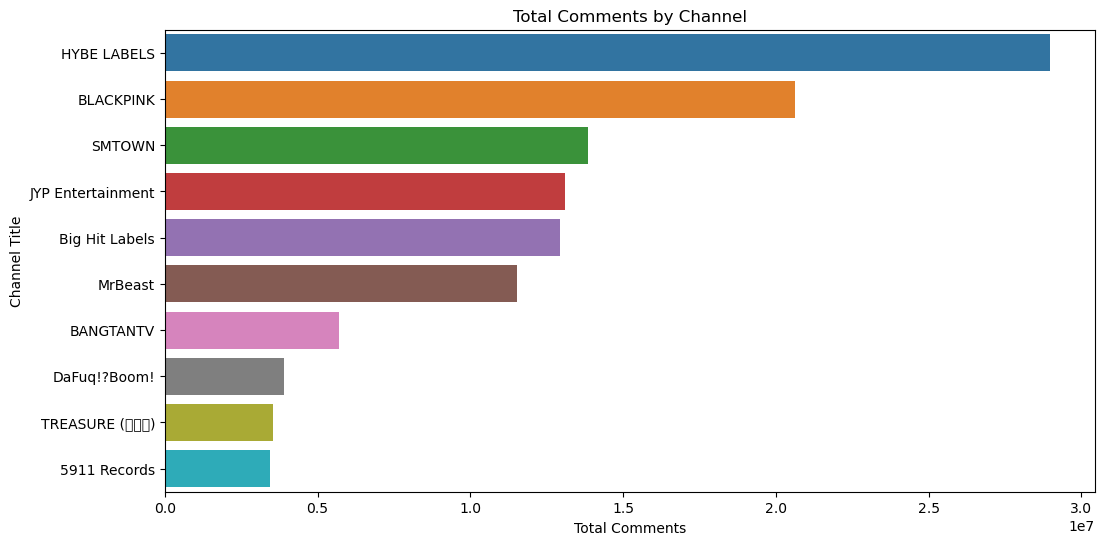

In [48]:
# Group videos by channel and calculate total comments
comments_by_channel = df.groupby('channelTitle')['comment_count'].sum().reset_index()

# Sort the data by total comments
comments_by_channel = comments_by_channel.sort_values(by='comment_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='comment_count', y='channelTitle', data=comments_by_channel.head(10))  # Plot only top 10 channels
plt.title('Total Comments by Channel')
plt.xlabel('Total Comments')
plt.ylabel('Channel Title')
plt.show()

/Users/mahshid/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mahshid/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mahshid/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


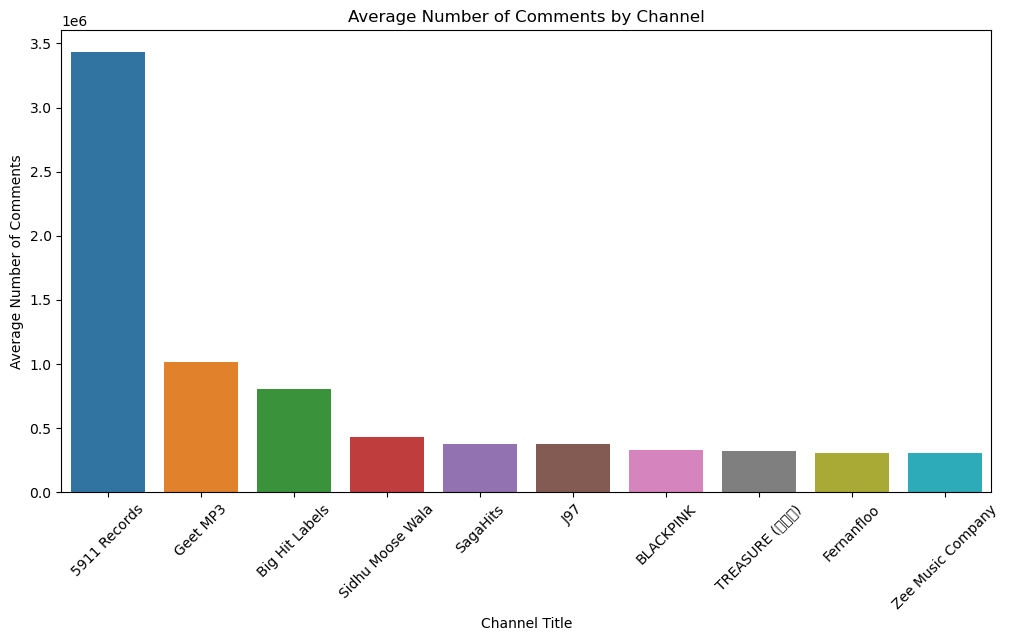

In [49]:
# Group videos by channel and calculate average number of comments
comments_by_channel = df.groupby('channelTitle')['comment_count'].mean().reset_index()

# Sort the data by average number of comments
comments_by_channel = comments_by_channel.sort_values(by='comment_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='channelTitle', y='comment_count', data=comments_by_channel.head(10))  # Plot only top 10 channels
plt.title('Average Number of Comments by Channel')
plt.xlabel('Channel Title')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=45)
plt.show()

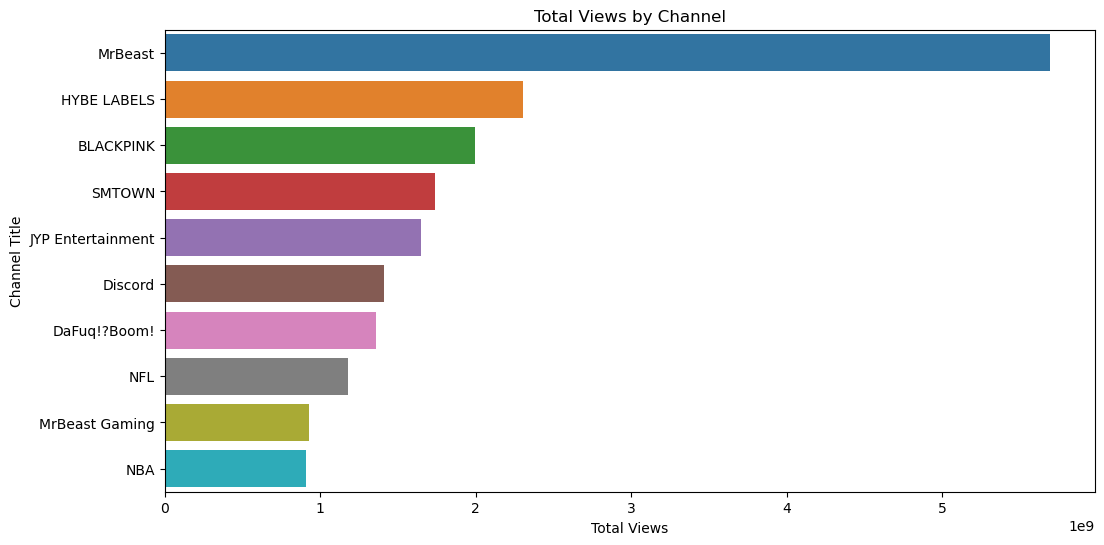

In [50]:
# Group videos by channel and calculate total views
views_by_channel = df.groupby('channelTitle')['view_count'].sum().reset_index()

# Sort the data by total views
views_by_channel = views_by_channel.sort_values(by='view_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='view_count', y='channelTitle', data=views_by_channel.head(10))  # Plot only top 10 channels
plt.title('Total Views by Channel')
plt.xlabel('Total Views')
plt.ylabel('Channel Title')
plt.show()

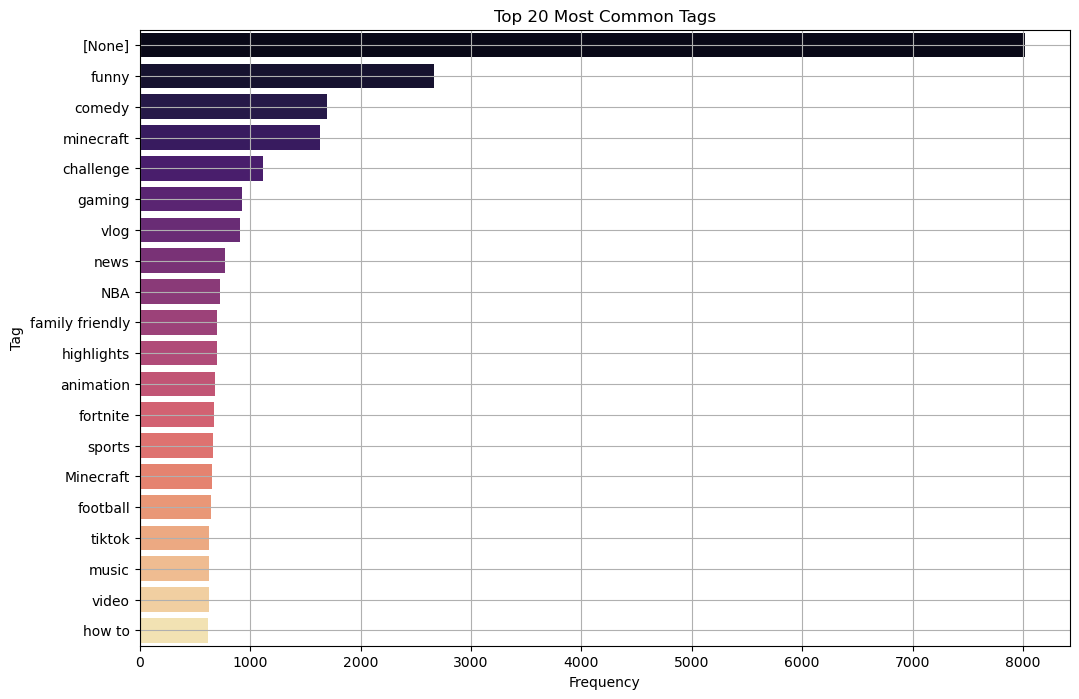

In [51]:
# Tag Analysis
import seaborn as sns
# Assuming 'tags' column contains comma-separated tags
tags = df['tags'].explode().value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=tags.values, y=tags.index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.title('Top 20 Most Common Tags')
plt.grid()
plt.show()

In [52]:
# Trend Analysis: 
# Are there any seasonal trends in video popularity?
# How do video metrics (views, likes, comments) change over time for specific channels or categories?
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Convert 'publishedAt' or 'trending_date' column to datetime format
# Choose one depending on whether you're interested in publishing or trending dates
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
# df['trending_date'] = pd.to_datetime(df['trending_date'])

# Extract month and year from the publishing date or trending date
df['month'] = df['publishedAt'].dt.month
df['year'] = df['publishedAt'].dt.year

# Group by month and year, and calculate aggregate statistics for views
views_by_month = df.groupby(['year', 'month'])['view_count'].mean()

# Print or visualize the results
print("Average views by month:")
print(views_by_month)

Average views by month:
year  month
2020  8        2.980076e+06
      9        2.633029e+06
      10       3.133011e+06
      11       3.125760e+06
      12       2.994964e+06
2021  1        2.966354e+06
      2        2.827145e+06
      3        3.065692e+06
      4        3.545156e+06
      5        4.265906e+06
      6        3.448673e+06
      7        2.993524e+06
      8        2.600072e+06
      9        2.524943e+06
      10       2.793704e+06
      11       2.301740e+06
      12       2.893003e+06
2022  1        2.020388e+06
      2        2.487487e+06
      3        2.465317e+06
      4        2.057461e+06
      5        2.149552e+06
      6        2.309090e+06
      7        2.179777e+06
      8        2.042078e+06
      9        2.119916e+06
      10       2.079916e+06
      11       2.012663e+06
      12       2.272234e+06
2023  1        1.929612e+06
      2        2.029414e+06
      3        2.393533e+06
      4        2.408629e+06
      5        2.479992e+06
      6     

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/1212064046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/1212064046.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['publishedAt'].dt.month
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/1212064046.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/3005683686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/3005683686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['publishedAt'].dt.month
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/3005683686.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

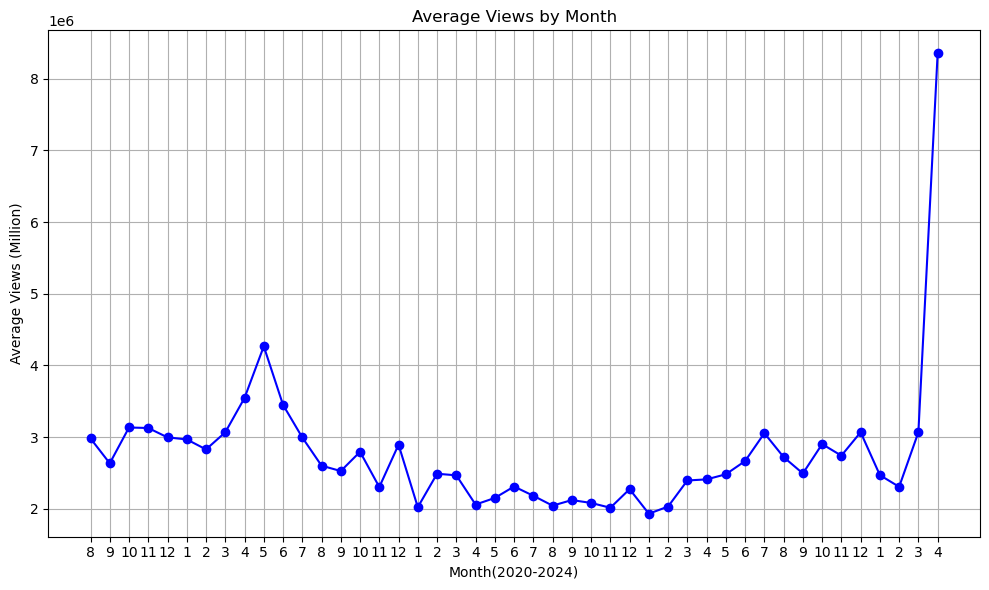

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Convert 'publishedAt' or 'trending_date' column to datetime format
# Choose one depending on whether you're interested in publishing or trending dates
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
# df['trending_date'] = pd.to_datetime(df['trending_date'])

# Extract month and year from the publishing date or trending date
df['month'] = df['publishedAt'].dt.month
df['year'] = df['publishedAt'].dt.year

# Group by month and year, and calculate aggregate statistics for views
views_by_month = df.groupby(['year', 'month'])['view_count'].mean()

# Reset index to make 'year' and 'month' columns accessible for plotting
views_by_month = views_by_month.reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(views_by_month.index, views_by_month['view_count'], marker='o', color='b')
plt.title('Average Views by Month')
plt.xlabel('Month(2020-2024)')
plt.ylabel('Average Views (Million)')
plt.xticks(range(len(views_by_month)), views_by_month['month'])
plt.grid(True)
plt.tight_layout()
plt.show()

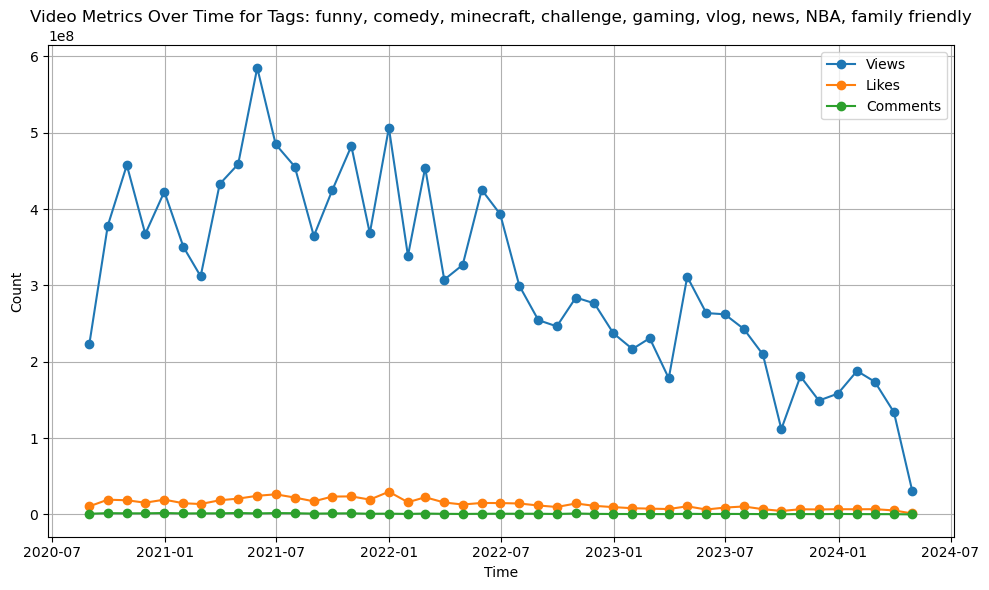

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Define the tags you want to analyze
# tags_to_analyze = df[[tags['funny', 'comedy', 'minecraft']]  # Replace with your desired tags
tags_to_analyze = ['funny', 'comedy', 'minecraft', 'challenge', 'gaming', 'vlog', 'news', 'NBA', 'family friendly']  # Replace with your desired tags


# Filter the data for videos containing the specified tags
tag_data = df[df['tags'].apply(lambda x: any(tag in x for tag in tags_to_analyze))]

# Group by time periods (e.g., months) and calculate aggregate statistics for video metrics
grouped_data = tag_data.groupby(pd.Grouper(key='publishedAt', freq='M')).agg({
    'view_count': 'sum',
    'likes': 'sum',
    'comment_count': 'sum'
})

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['view_count'], label='Views', marker='o')
plt.plot(grouped_data.index, grouped_data['likes'], label='Likes', marker='o')
plt.plot(grouped_data.index, grouped_data['comment_count'], label='Comments', marker='o')
plt.title(f'Video Metrics Over Time for Tags: {", ".join(tags_to_analyze)}')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Top 10 most common tags among trending videos:
# [None]             8021
# funny              2667
# comedy             1701
# minecraft          1636
# challenge          1118
# gaming              930
# vlog                912
# news                774
# NBA                 727
# family friendly     704

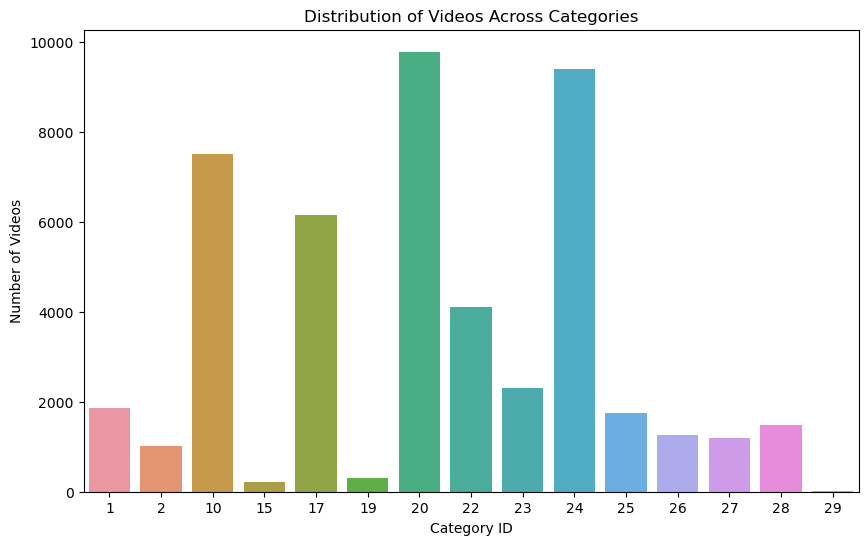

In [55]:
# Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='categoryId', data=df)
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.title('Distribution of Videos Across Categories')
plt.show()

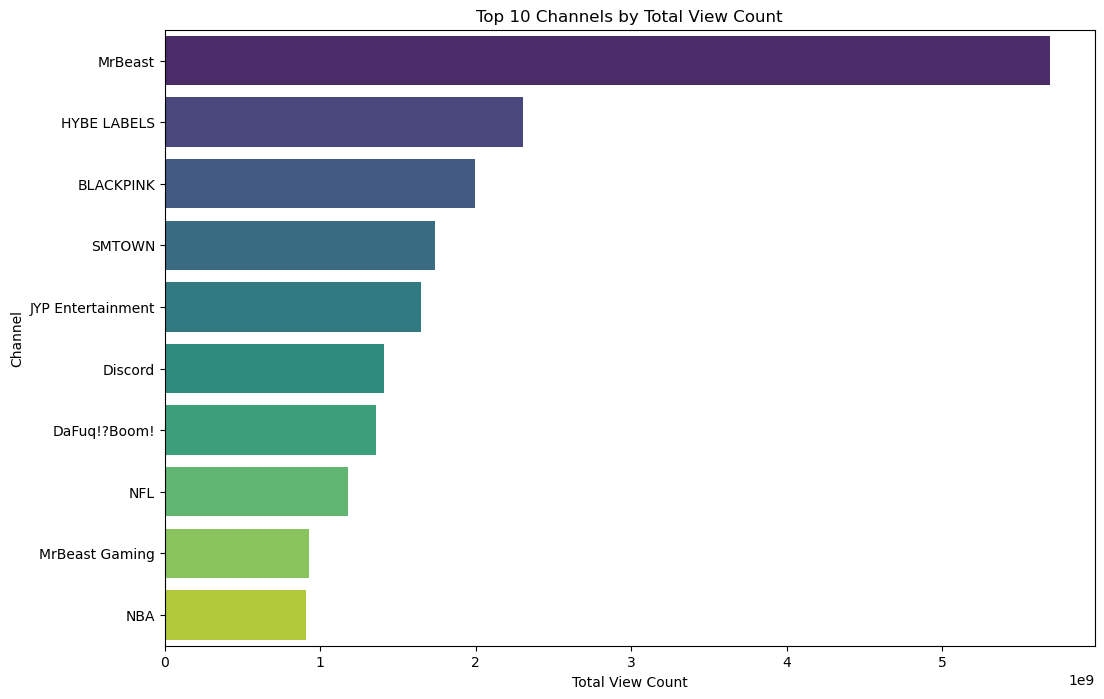

In [56]:
# Channel Analysis
channel_grouped = df.groupby('channelTitle').agg({'view_count': 'sum', 'likes': 'sum', 'comment_count': 'sum'}).reset_index()
channel_grouped = channel_grouped.sort_values(by='view_count', ascending=False).head(10)  # Top 10 channels by view count
plt.figure(figsize=(12, 8))
sns.barplot(x='view_count', y='channelTitle', data=channel_grouped, palette='viridis')
plt.xlabel('Total View Count')
plt.ylabel('Channel')
plt.title('Top 10 Channels by Total View Count')
plt.show()

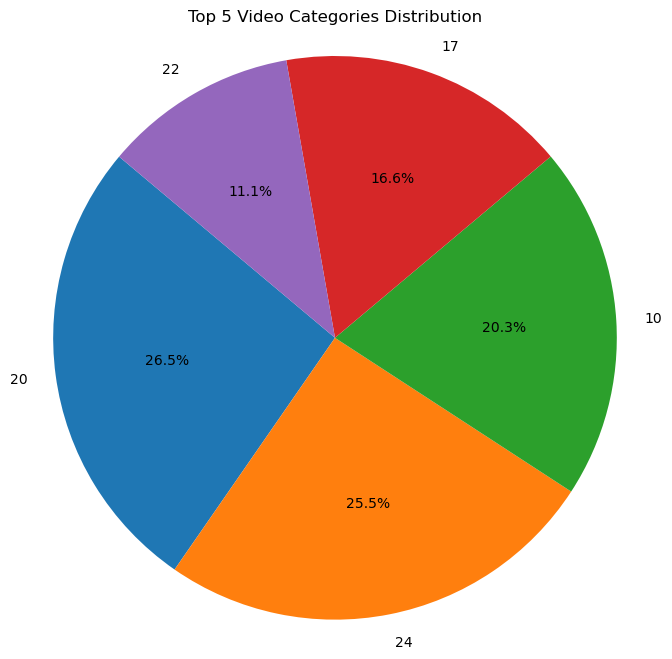

In [57]:
# Pie Chart
top_categories = df['categoryId'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 5 Video Categories Distribution')
plt.show()

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/2520728907.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trendiness_monthly = df.groupby(df['trending_date'].dt.to_period('M')).size()


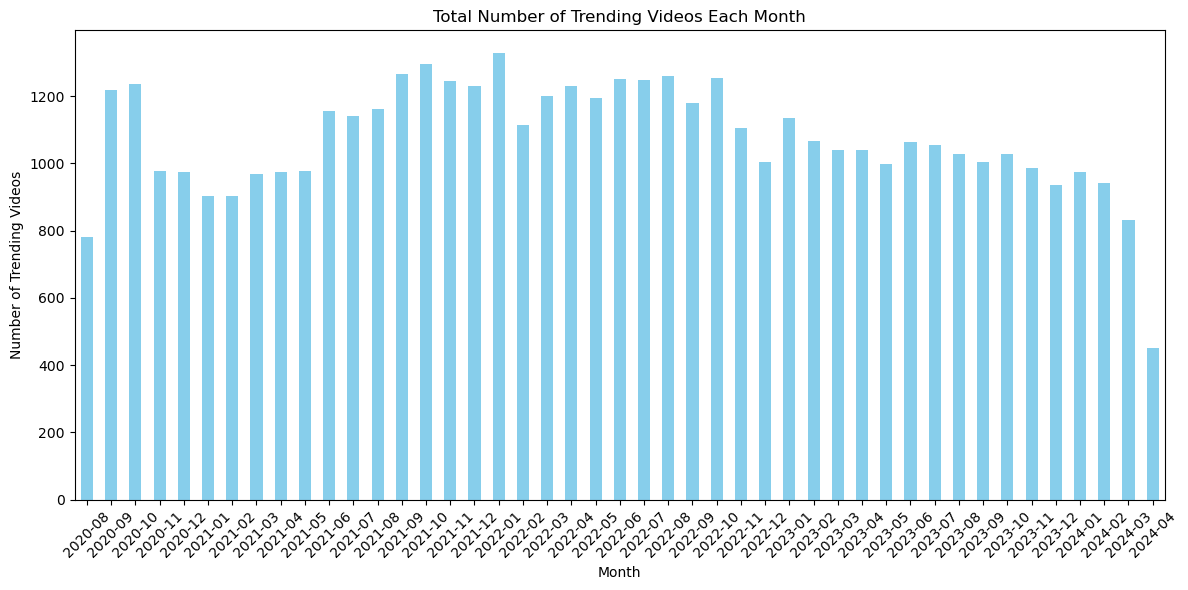

In [58]:
# Group by month and count the number of videos trending each month
trendiness_monthly = df.groupby(df['trending_date'].dt.to_period('M')).size()

# Plot the total number of trending videos for each month (Bar Plot - Monthly)
plt.figure(figsize=(12, 6))
trendiness_monthly.plot(kind='bar', color='skyblue')
plt.title('Total Number of Trending Videos Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/3783804853.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trending_date'] = pd.to_datetime(df['trending_date'])


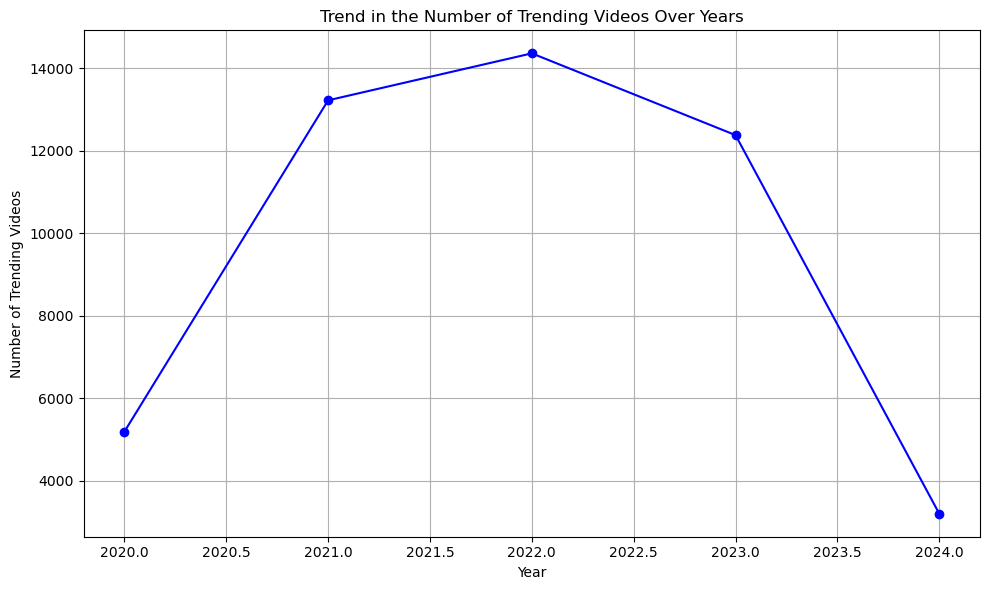

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Convert 'trending_date' column to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Group by year and count the number of videos trending each year
trendiness_yearly = df.groupby(df['trending_date'].dt.year).size()

# Plot the trend in the number of trending videos over each year
plt.figure(figsize=(10, 6))
plt.plot(trendiness_yearly.index, trendiness_yearly.values, marker='o', color='b', linestyle='-')
plt.title('Trend in the Number of Trending Videos Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Trending Videos')
plt.grid(True)
plt.tight_layout()
plt.show()

Saturday seems to have the most volume in the week


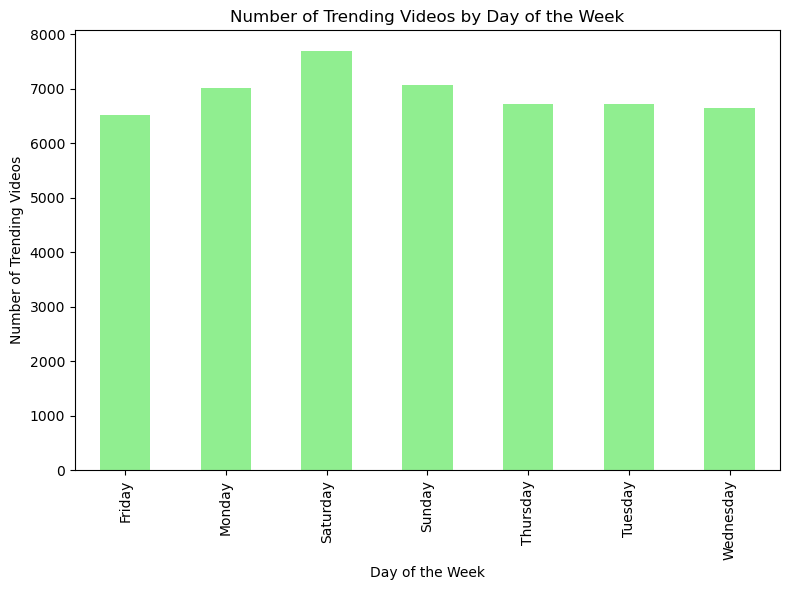

In [60]:
# Number of Trending Videos by Day of the Week
trendiness_weekday = df.groupby(df['trending_date'].dt.day_name()).size()
plt.figure(figsize=(8, 6))
trendiness_weekday.plot(kind='bar', color='lightgreen')
plt.title('Number of Trending Videos by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trending Videos')
plt.tight_layout()
print("Saturday seems to have the most volume in the week")
plt.show()

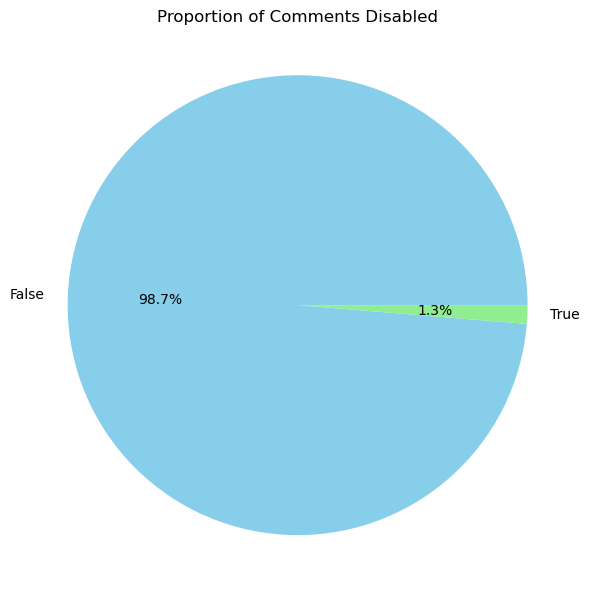

In [61]:
# Proportion of Comments Disabled
comments_disabled_counts = df['comments_disabled'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(comments_disabled_counts, labels=comments_disabled_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Comments Disabled')
plt.axis('equal')
plt.tight_layout()
plt.show()

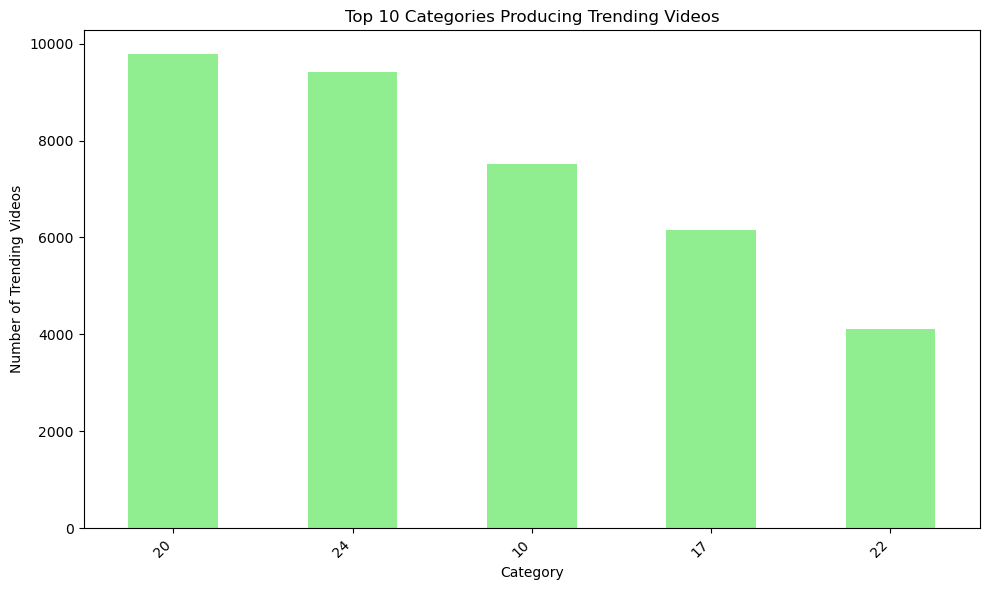

In [62]:
# # Plot the top channels
# plt.figure(figsize=(10, 6))
# top_channels.plot(kind='bar', color='skyblue')
# plt.title('Top 10 Channels Producing Trending Videos')
# plt.xlabel('Channel')
# plt.ylabel('Number of Trending Videos')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# Plot the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Categories Producing Trending Videos')
plt.xlabel('Category')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
# Convert 'publishedAt' column to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Calculate the time difference between 'trending_date' and 'publishedAt' columns
df['time_to_trend'] = df['trending_date'] - df['publishedAt']

# Filter videos that trended within the first 24 hours of publication
videos_trended_within_24_hours = df[df['time_to_trend'] <= pd.Timedelta(days=1)]

# Sort the filtered DataFrame by 'view_count' in descending order
fastest_viral_video_24h = videos_trended_within_24_hours.nlargest(1, 'view_count')

# Print information about the fastest viral video gained in the first 24 hours
print("Fastest viral video within 24 hours:")
fastest_viral_video_24h[['title', 'view_count', 'publishedAt']]


# This code will identify the fastest viral YouTube video that gained the most views within the first 24 hours 

Fastest viral video within 24 hours:


/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/787354778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/787354778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_trend'] = df['trending_date'] - df['publishedAt']


,title,view_count,publishedAt
262787,Train Vs Lamborghini,38173956,2024-03-16 16:00:00+00:00


In [64]:
# Extract the view count of the fastest viral YouTube video gained in the first 24 hours
views_fastest_video_24h = fastest_viral_video_24h.iloc[0]['view_count']

# Print the number of views gained by the fastest viral YouTube video in the first 24 hours
print("Number of views gained by the fastest viral YouTube video in the first 24 hours:", views_fastest_video_24h)

Number of views gained by the fastest viral YouTube video in the first 24 hours: 38173956


In [65]:
# Sort the filtered DataFrame by 'view_count' in descending order and select the top 10
top_10_fastest_viral_videos_24h = videos_trended_within_24_hours.nlargest(10, 'view_count')

# Print information about the top 10 fastest viral videos gained in the first 24 hours
print("Top ten fastest viral videos within 24 hours:")
top_10_fastest_viral_videos_24h[['title', 'view_count', 'publishedAt']]

Top ten fastest viral videos within 24 hours:


,title,view_count,publishedAt
262787,Train Vs Lamborghini,38173956,2024-03-16 16:00:00+00:00
17398,"Live: Joe Biden, Kamala Harris Address The Nat...",19983734,2020-11-08 03:09:03+00:00
50404,I Got Hunted By A Bounty Hunter,16372557,2021-04-24 20:00:00+00:00
264807,Bade Miyan Chote Miyan - OFFICIAL HINDI TRAILE...,14061617,2024-03-26 07:12:26+00:00
267787,Joker: Folie à Deux | Official Teaser Trailer,13797158,2024-04-10 00:53:54+00:00
67791,"Offering Students $100,000 To Quit School",12899180,2021-07-10 20:00:09+00:00
5001,"Get Him 1,000,000 Subscribers in 24 Hours",12035592,2020-09-05 20:00:17+00:00
36393,Donating $.10 For Every Subscriber,11038284,2021-02-13 21:00:01+00:00
14807,I Uber’d People And Gave Them A Lamborghini,10436587,2020-10-24 20:00:01+00:00
18798,"Push This Red Button For $100,000",10379834,2020-11-14 21:00:02+00:00


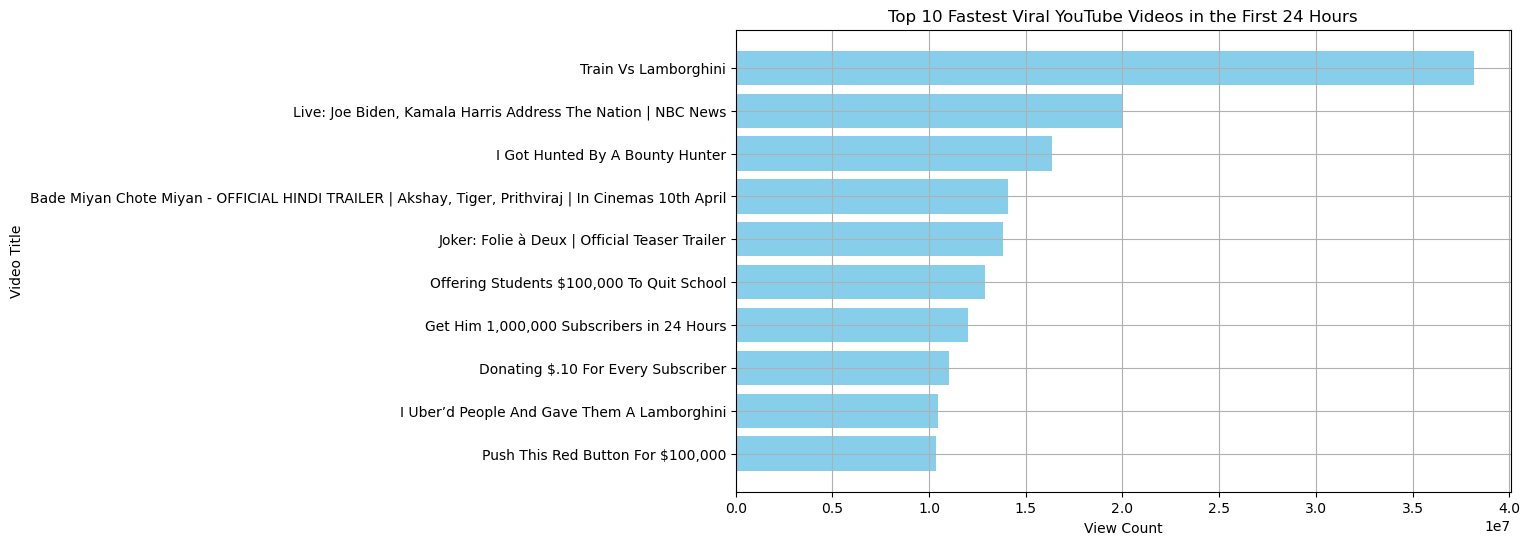

In [66]:
import matplotlib.pyplot as plt

# Sort the filtered DataFrame by 'view_count' in descending order and select the top 10
top_10_fastest_viral_videos_24h = videos_trended_within_24_hours.nlargest(10, 'view_count')

# Plot the top 10 fastest viral videos gained in the first 24 hours
plt.figure(figsize=(10, 6))
plt.barh(top_10_fastest_viral_videos_24h['title'], top_10_fastest_viral_videos_24h['view_count'], color='skyblue')
plt.xlabel('View Count')
plt.ylabel('Video Title')
plt.grid()
plt.title('Top 10 Fastest Viral YouTube Videos in the First 24 Hours')
plt.gca().invert_yaxis()  # Invert y-axis to display the video with the highest view count at the top
plt.show()

In [67]:
# Index items that will  change based of user engagment are Variable Index items
# Variable Index items are "publishedAt", "trending_date", "view_count", "likes", "dislikes", "comment_count".

variable_index = ['publishedAt', 'trending_date', 'view_count', 'likes', 'dislikes', 'comment_count']

df_variable_index = df.sort_values(by='view_count', ascending=False)[variable_index]

df_variable_index

,publishedAt,trending_date,view_count,likes,dislikes,comment_count
266187,2024-04-01 17:46:17+00:00,2024-04-03 00:00:00+00:00,1407643634,126926,0,13987
152788,2022-08-19 04:00:13+00:00,2022-09-10 00:00:00+00:00,277791741,12993894,0,3534337
56374,2021-05-21 03:46:13+00:00,2021-05-30 00:00:00+00:00,264407389,16021534,150989,6738537
3358,2020-08-21 03:58:10+00:00,2020-08-28 00:00:00+00:00,232649205,15735533,714194,6065230
73564,2021-07-03 04:04:57+00:00,2021-08-08 00:00:00+00:00,206202284,6840430,240769,2826
...,...,...,...,...,...,...
143804,2022-07-25 15:00:32+00:00,2022-07-28 00:00:00+00:00,0,0,0,0
19027,2020-11-14 22:39:13+00:00,2020-11-16 00:00:00+00:00,0,0,0,0
201188,2023-05-02 01:36:13+00:00,2023-05-10 00:00:00+00:00,0,97565,0,1931
48995,2021-04-17 14:56:38+00:00,2021-04-18 00:00:00+00:00,0,0,0,0


In [68]:
# Filter line items by highest view count for each similiar row.

columns_to_display = ['publishedAt', 'title', 'channelId', 'channelTitle', 'trending_date', 'view_count', 'likes', 'dislikes', 'comment_count']

view_count_df = df.sort_values(by='view_count', ascending=False)[columns_to_display]

view_count_df

,publishedAt,title,channelId,channelTitle,trending_date,view_count,likes,dislikes,comment_count
266187,2024-04-01 17:46:17+00:00,Discord Loot Boxes are here.,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,2024-04-03 00:00:00+00:00,1407643634,126926,0,13987
152788,2022-08-19 04:00:13+00:00,BLACKPINK - ‘Pink Venom’ M/V,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,2022-09-10 00:00:00+00:00,277791741,12993894,0,3534337
56374,2021-05-21 03:46:13+00:00,BTS (방탄소년단) 'Butter' Official MV,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2021-05-30 00:00:00+00:00,264407389,16021534,150989,6738537
3358,2020-08-21 03:58:10+00:00,BTS (방탄소년단) 'Dynamite' Official MV,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,2020-08-28 00:00:00+00:00,232649205,15735533,714194,6065230
73564,2021-07-03 04:04:57+00:00,Turn into orbeez - Tutorial #Shorts,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,2021-08-08 00:00:00+00:00,206202284,6840430,240769,2826
...,...,...,...,...,...,...,...,...,...
143804,2022-07-25 15:00:32+00:00,Celebrating Steelpan,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,2022-07-28 00:00:00+00:00,0,0,0,0
19027,2020-11-14 22:39:13+00:00,Celebrating Maria Tallchief,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,2020-11-16 00:00:00+00:00,0,0,0,0
201188,2023-05-02 01:36:13+00:00,Live at the Met Gala With Vogue,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,2023-05-10 00:00:00+00:00,0,97565,0,1931
48995,2021-04-17 14:56:38+00:00,The Funeral of The Duke of Edinburgh,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,2021-04-18 00:00:00+00:00,0,0,0,0


In [69]:
# Most recent published video = 04/10/2024
# First published videos = 08/03/2020

unique_videos_view['publishedAt'] = pd.to_datetime(unique_videos_view['publishedAt'])

df_range = unique_videos_view.sort_values(by='publishedAt', ascending=False)[columns_to_display]

df_range

/var/folders/t7/hxd3pgr11qjblzs42br5s1_40000gn/T/ipykernel_69122/1888740222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_videos_view['publishedAt'] = pd.to_datetime(unique_videos_view['publishedAt'])


,publishedAt,title,channelId,channelTitle,trending_date,view_count,likes,dislikes,comment_count
267790,2024-04-10 16:00:27+00:00,We Played a YouTuber Simulator,UC-gW4TeZAlKm7UATp24JsWQ,SMii7Yplus,2024-04-11 00:00:00+00:00,1025003,75944,0,1267
267800,2024-04-10 16:00:06+00:00,HIT ME HARD AND SOFT: Making the Splatter Pain...,UCiGm_E4ZwYSHV3bcW1pnSeQ,Billie Eilish,2024-04-11 00:00:00+00:00,167368,28380,0,932
267825,2024-04-10 15:00:18+00:00,Surprising Zach With a Giant Shrek Cake,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys,2024-04-11 00:00:00+00:00,338171,24164,0,1052
267789,2024-04-10 13:00:34+00:00,Civil War | Official Final Trailer HD | A24,UCuPivVjnfNo4mb3Oog_frZg,A24,2024-04-11 00:00:00+00:00,1879699,4551,0,744
267804,2024-04-10 04:25:14+00:00,WARRIORS at LAKERS | FULL GAME HIGHLIGHTS | Ap...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2024-04-11 00:00:00+00:00,1196937,13647,0,1972
...,...,...,...,...,...,...,...,...,...
197,2020-08-05 21:07:19+00:00,Brooklyn's 10 DATES in 10 DAYS | Meet Jorge (D...,UC6QWhGQqf0YDYdRb0n6ojWw,Brooklyn and Bailey,2020-08-12 00:00:00+00:00,1120675,41671,888,5282
180,2020-08-05 21:01:33+00:00,Explained: What happened in deadly Beirut expl...,UCoMdktPbSTixAyNGwb-UYkQ,Sky News,2020-08-12 00:00:00+00:00,8496552,74508,3034,11855
198,2020-08-05 19:42:52+00:00,"I FOUGHT BRYCE HALL...Ft. Mike Majlak, Lana Rh...",UCWTQG2aMDYKGDqYEGqJb1FA,Life of Bradley Martyn,2020-08-12 00:00:00+00:00,1123529,39289,2056,3626
183,2020-08-05 19:00:01+00:00,This is Goodbye,UCIcgBZ9hEJxHv6r_jDYOMqg,Unus Annus,2020-08-12 00:00:00+00:00,4971181,360168,7850,48742


In [70]:
# Videos with disabled comments or ratings

disabled_videos = unique_videos_view[(unique_videos_view['comments_disabled'] == True) | (unique_videos_view['ratings_disabled'] == True)]

disabled_videos.shape

(831, 22)

In [72]:
# Calculate total values for videos with disabled engagement

disabled_engagement = df[df['ratings_disabled'] | df['comments_disabled']]
total_disabled_likes = disabled_engagement['likes'].sum()
total_disabled_dislikes = disabled_engagement['dislikes'].sum()
total_disabled_views = disabled_engagement['view_count'].sum()

In [73]:
# Display the results

print("Total engagement values for all videos with disabled engagement:")
print("Likes: ", total_disabled_likes)
print("Dislikes: ", total_disabled_dislikes)
print("View count: ", total_disabled_views)

Total engagement values for all videos with disabled engagement:
Likes:  29907630
Dislikes:  1127112
View count:  2527188037


In [74]:
# Number of videos without enabled engagement

num_disabled_videos = len(disabled_engagement)

num_disabled_videos

831

In [75]:
# Average engagment values per video without enabled engagement

average_disabled_likes = round(total_disabled_likes / num_disabled_videos)
average_disabled_dislikes = round(total_disabled_dislikes / num_disabled_videos)
average_disabled_views = round(total_disabled_views / num_disabled_videos)

In [76]:
# Print the average engagment per video

print("\nAverage values per video without enabled engagement:")
print("Likes: ", average_disabled_likes)
print("Dislikes: ", average_disabled_dislikes)
print("View count: ", average_disabled_views)


Average values per video without enabled engagement:
Likes:  35990
Dislikes:  1356
View count:  3041141


In [77]:
# Videos with enabled engagement

enabled_videos = df[(df['comments_disabled'] == False) & (df['ratings_disabled'] == False)]

enabled_videos.shape

(47530, 22)

In [78]:

# Calculate total values for videos with enabled engagement

enabled_engagement = df[~(df['ratings_disabled'] | df['comments_disabled'])]
total_enabled_likes = enabled_engagement['likes'].sum()
total_enabled_dislikes = enabled_engagement['dislikes'].sum()
total_enabled_views = enabled_engagement['view_count'].sum()

In [79]:
# Display the results

print("\nVideos with enabled engagement total values:")
print("Likes: ", total_enabled_likes)
print("Dislikes: ", total_enabled_dislikes)
print("View count: ", total_enabled_views)


Videos with enabled engagement total values:
Likes:  5703923345
Dislikes:  55705004
View count:  125160599560


In [80]:
# Number of videos with enabled engagement

num_enabled_videos = len(enabled_engagement)

num_enabled_videos

47530

In [81]:
# Average engagment values per video with enabled engagement

average_enabled_likes = round(total_enabled_likes / num_enabled_videos)
average_enabled_dislikes = round(total_enabled_dislikes / num_enabled_videos)
average_enabled_views = round(total_enabled_views / num_enabled_videos)

In [82]:
# Print the average engagment per video

print("\nAverage values per video with enabled engagement:")
print("Likes: ", average_enabled_likes)
print("Dislikes: ", average_enabled_dislikes)
print("View count: ", average_enabled_views)


Average values per video with enabled engagement:
Likes:  120007
Dislikes:  1172
View count:  2633297


In [83]:
# Compare Views
views = [average_enabled_views, average_disabled_views]

view_titles = ['enabled_views', 'disabled_views']

In [ ]:
# Visual comparison
# Average engagement for disabled vs enabled videos

plt.figure(figsize=(12, 6))
plt.bar(x= view_titles, height = views)
plt.title('Total Average Views Per Video')
plt.xlabel('Engagment')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()